<a href="https://colab.research.google.com/github/sudhamsalagar123/Data-Science-Internship-Project/blob/main/Company_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("Company_Costs.csv")

In [3]:
df.head(3)

,Month,Labor_Cost,Material_Cost,Utility_Cost,Production_Volume,Machine_Downtime,Outsourcing_Fees,Inventory_Holding_Cost,Total_Cost
0,Jan,50000,40000,10000,10000,12,8000,6000,119000
1,Feb,52000,38000,9500,9800,15,9000,5800,124300
2,Mar,51000,41000,10200,10200,10,8500,6200,126900


In [4]:
# 1. Comprehensive Analysis
print("Basic Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   5 non-null      object
 1   Labor_Cost              5 non-null      int64 
 2   Material_Cost           5 non-null      int64 
 3   Utility_Cost            5 non-null      int64 
 4   Production_Volume       5 non-null      int64 
 5   Machine_Downtime        5 non-null      int64 
 6   Outsourcing_Fees        5 non-null      int64 
 7   Inventory_Holding_Cost  5 non-null      int64 
 8   Total_Cost              5 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 492.0+ bytes
Basic Info:
 None

Descriptive Statistics:
         Labor_Cost  Material_Cost  Utility_Cost  Production_Volume  \
count      5.00000        5.00000      5.000000           5.000000   
mean   51000.00000    40000.00000  10000.000000        9940.000000   
std     1581.13883 

In [6]:
# Drop non-numeric columns before correlation
numeric_df = df.drop(columns=["Month"])

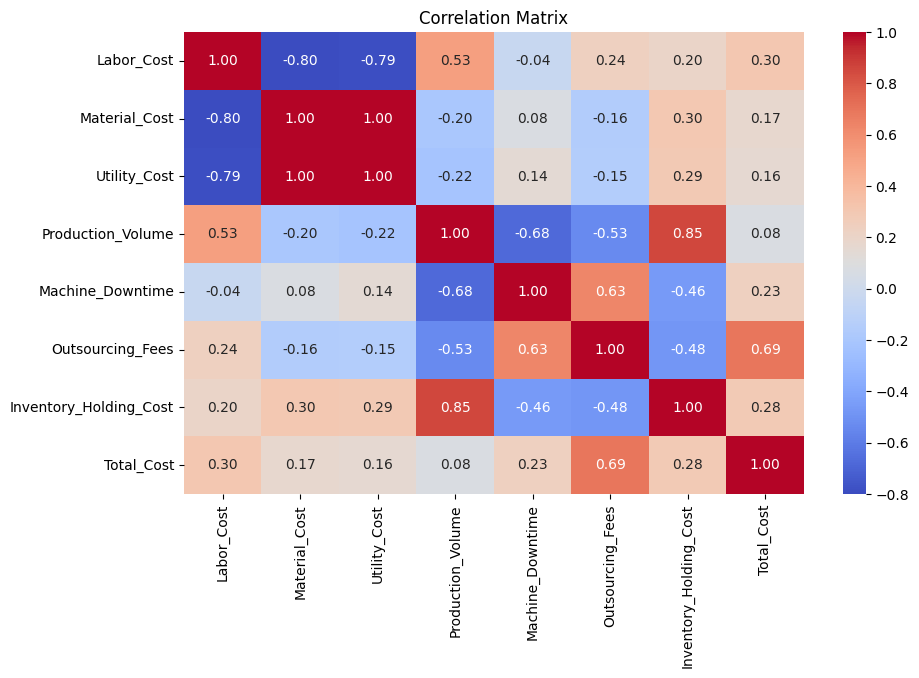

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

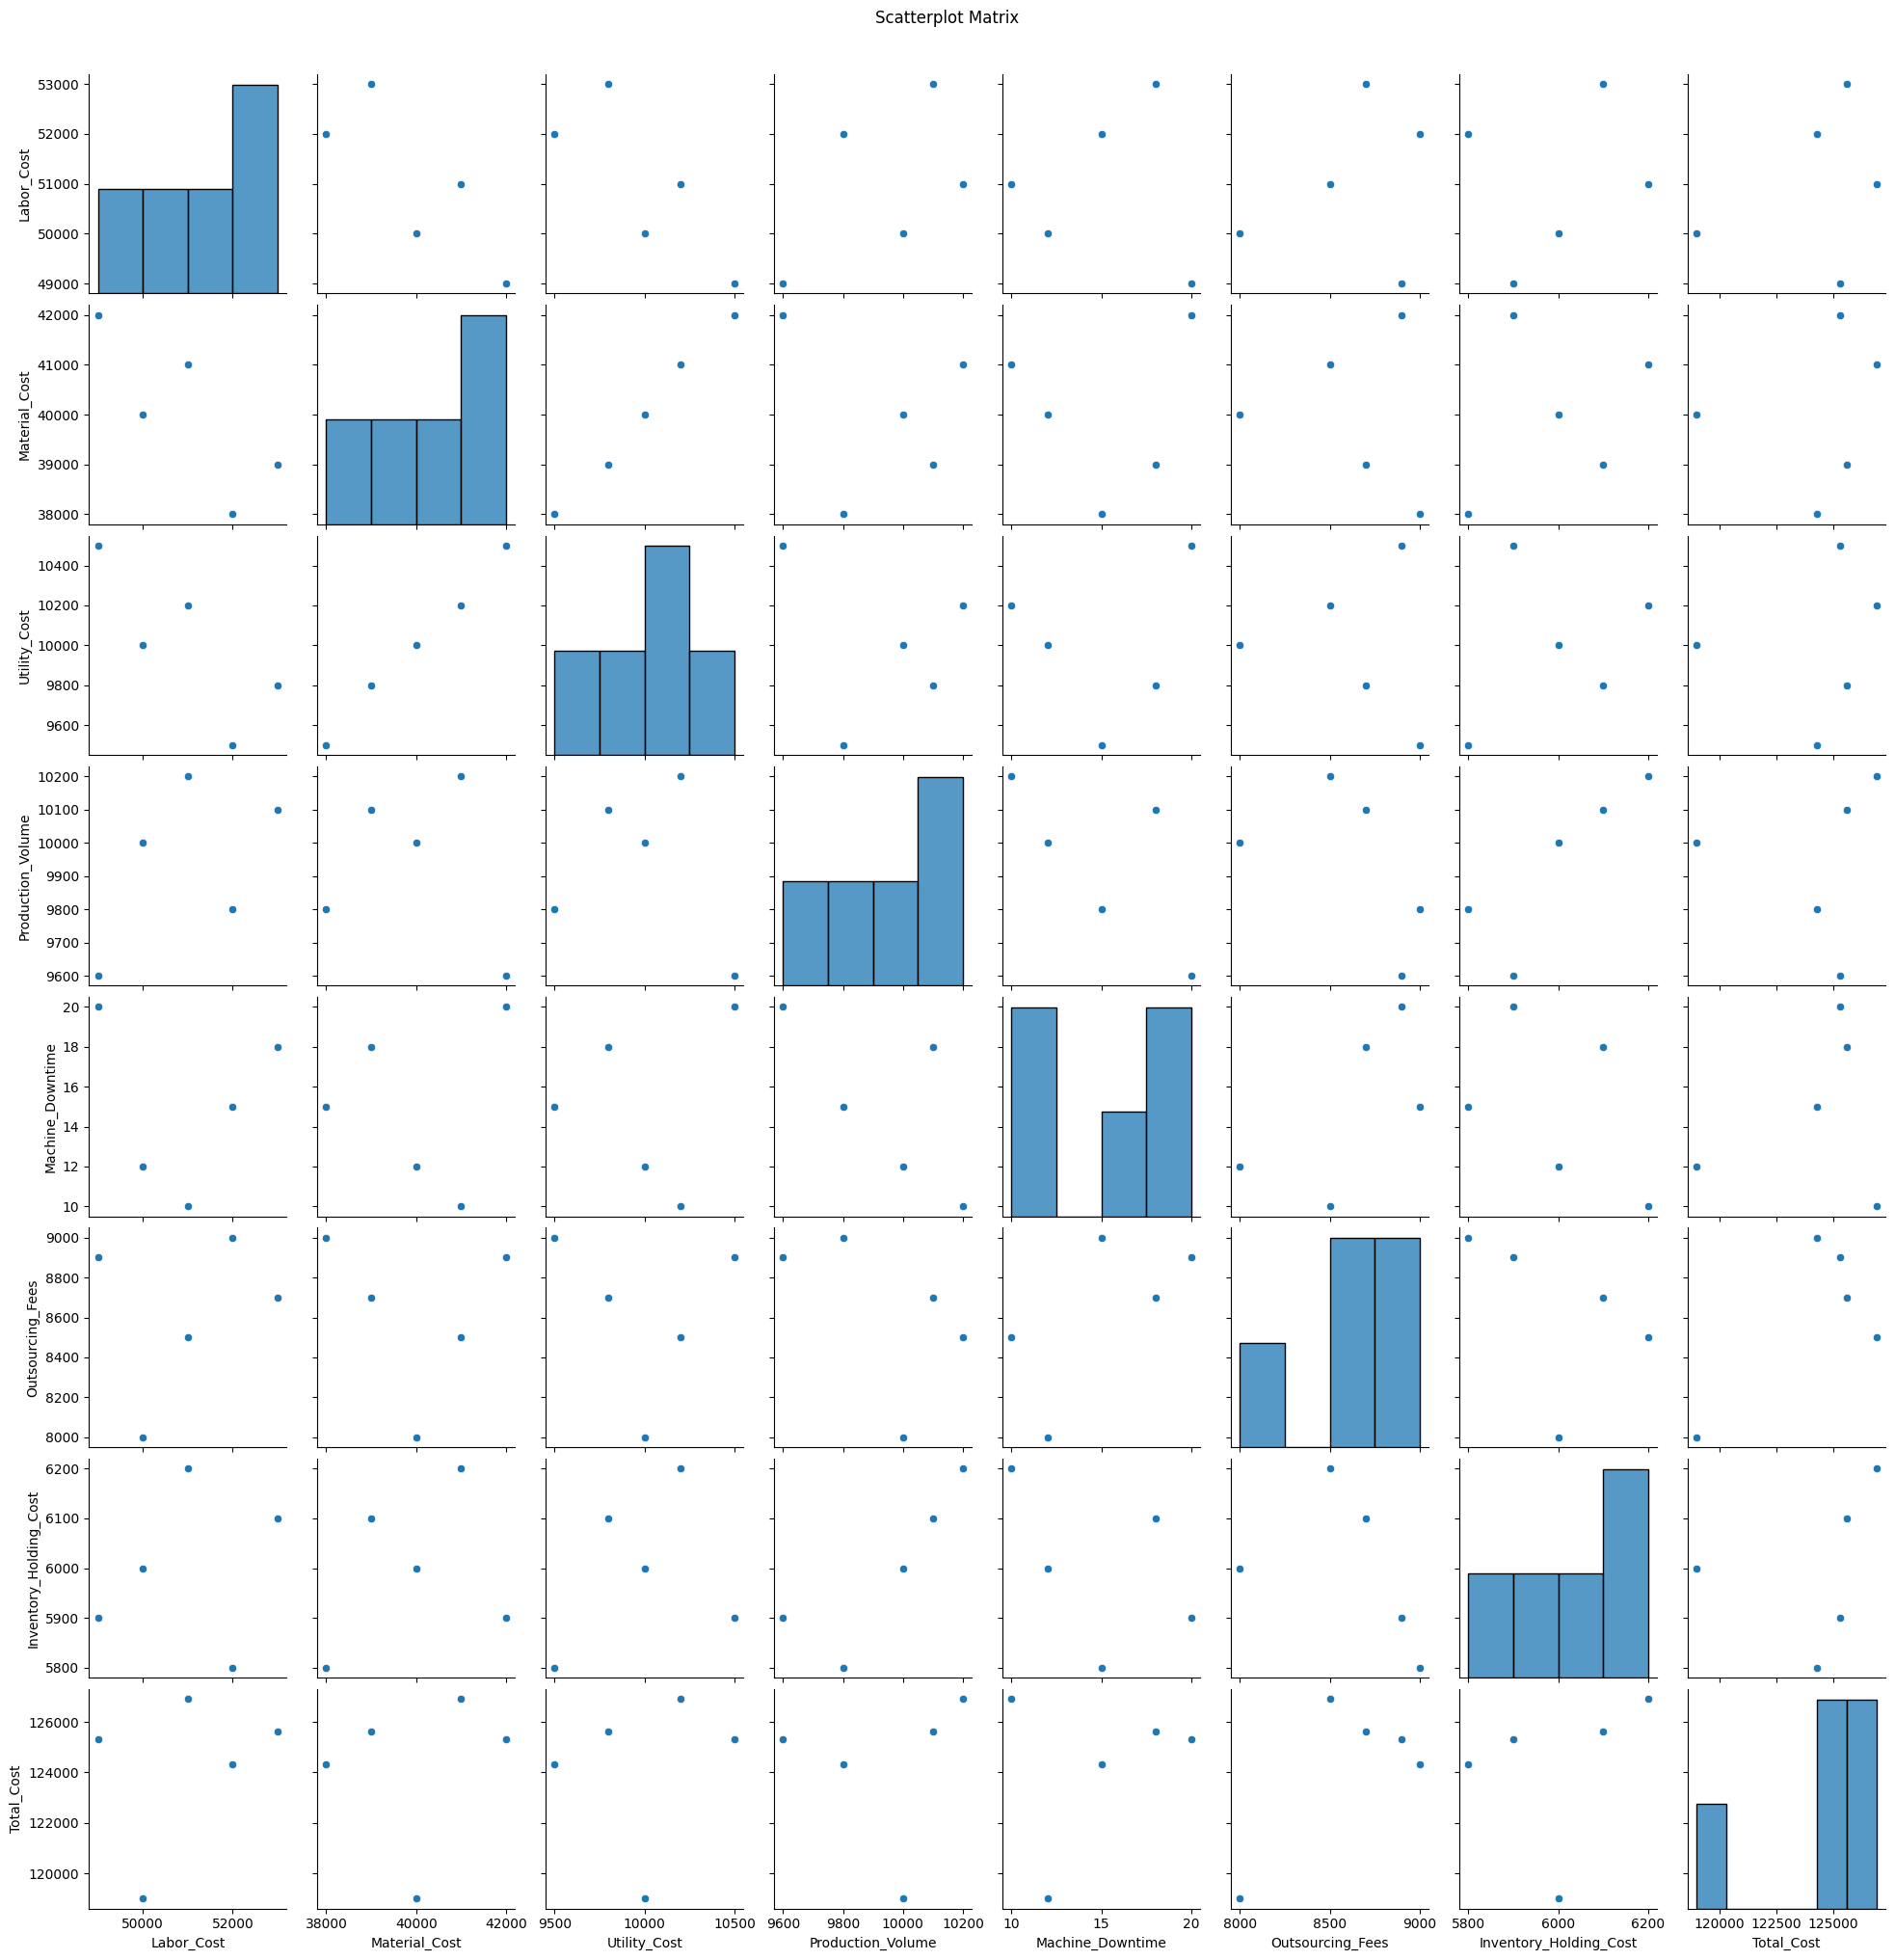

In [10]:
# Pairplot (only for numeric columns)
plt.figure(figsize=(10, 6))
sns.pairplot(numeric_df)
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

In [11]:
# Define explanatory variables and response variable
X = df[[
    "Labor_Cost", "Material_Cost", "Utility_Cost",
    "Production_Volume", "Machine_Downtime",
    "Outsourcing_Fees", "Inventory_Holding_Cost"
]]
y = df["Total_Cost"]

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


In [12]:
# Evaluation
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercept: {model.intercept_:.2f}")
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")



Model Coefficients:
Labor_Cost: 0.12
Material_Cost: 2.02
Utility_Cost: -4.46
Production_Volume: 8.18
Machine_Downtime: -0.44
Outsourcing_Fees: 9.03
Inventory_Holding_Cost: 2.50

Intercept: -92260.03
R^2 Score: 1.0000
RMSE: 0.00


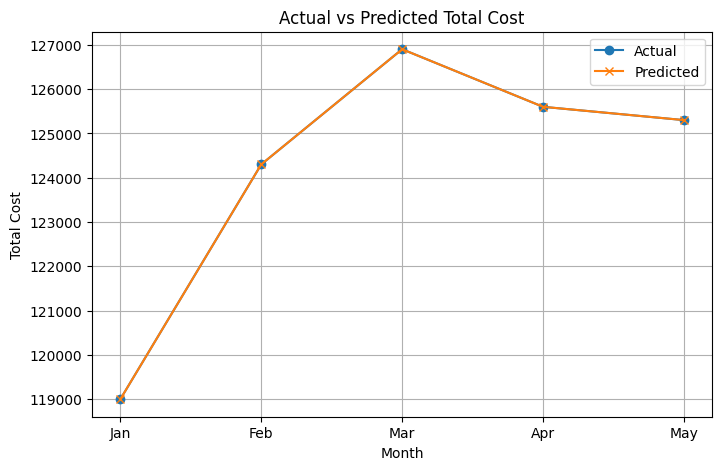

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(df["Month"], y, label='Actual', marker='o')
plt.plot(df["Month"], y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Total Cost")
plt.xlabel("Month")
plt.ylabel("Total Cost")
plt.legend()
plt.grid(True)
plt.show()